In [ ]:
#pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer # for missing value imputation

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# for model building

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier
)
from xgboost import XGBClassifier

#metrics
from sklearn import metrics
from sklearn.metrics import ( 
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)

In [3]:
df = pd.read_csv("Train.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,-2.909996,-2.568662,4.109032,1.316672,-1.620594,-3.827212,-1.616970,0.669006,0.387045,0.853814,...,-3.782686,-6.823172,4.908562,0.481554,5.338051,2.381297,-3.127756,3.527309,-3.019581,0
2,4.283674,5.105381,6.092238,2.639922,-1.041357,1.308419,-1.876140,-9.582412,3.469504,0.763395,...,-3.097934,2.690334,-1.643048,7.566482,-3.197647,-3.495672,8.104779,0.562085,-4.227426,0
3,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
4,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0


In [4]:
print(len(df.columns))
print(df.columns)
print(len(df))
print(df.shape)

41
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'Target'],
      dtype='object')
40000
(40000, 41)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

In [6]:
df.isnull().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [7]:
df.nunique()

V1        39954
V2        39961
V3        40000
V4        40000
V5        40000
V6        40000
V7        40000
V8        40000
V9        40000
V10       40000
V11       40000
V12       40000
V13       40000
V14       40000
V15       39999
V16       40000
V17       40000
V18       40000
V19       40000
V20       40000
V21       40000
V22       40000
V23       40000
V24       40000
V25       40000
V26       40000
V27       40000
V28       40000
V29       40000
V30       40000
V31       40000
V32       40000
V33       40000
V34       40000
V35       40000
V36       40000
V37       40000
V38       40000
V39       40000
V40       40000
Target        2
dtype: int64

In [8]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,39954.000000,39961.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,-0.288120,0.442672,2.505514,-0.066078,-0.044574,-1.000849,-0.892793,-0.563123,-0.007739,-0.001848,...,0.326831,0.056542,-0.464127,2.234861,1.530020,-0.000498,-0.351199,0.900035,-0.897166,0.054675
std,3.449072,3.139431,3.406263,3.437330,2.107183,2.036756,1.756510,3.298916,2.161833,2.183034,...,5.499369,3.574219,3.185712,2.924185,3.819754,1.778273,3.964186,1.751022,2.997750,0.227348
min,-13.501880,-13.212051,-11.469369,-16.015417,-8.612973,-10.227147,-8.205806,-15.657561,-8.596313,-11.000790,...,-23.200866,-17.454014,-17.985094,-15.349803,-17.478949,-7.639952,-17.375002,-7.135788,-11.930259,0.000000
25%,-2.751460,-1.638355,0.202682,-2.349574,-1.507206,-2.363446,-2.036913,-2.660415,-1.493676,-1.390549,...,-3.392115,-2.237550,-2.127757,0.332081,-0.937119,-1.265717,-3.016805,-0.261578,-2.949590,0.000000
50%,-0.773518,0.463939,2.265319,-0.123691,-0.096824,-1.006635,-0.934738,-0.384188,-0.052085,0.105779,...,0.056243,-0.049729,-0.250842,2.110125,1.571511,-0.132620,-0.318724,0.921321,-0.949269,0.000000
75%,1.836708,2.537508,4.584920,2.148596,1.346224,0.373909,0.206820,1.714383,1.425713,1.486105,...,3.789241,2.255985,1.432885,4.044659,3.996721,1.160828,2.291342,2.069016,1.092178,0.000000
max,17.436981,13.089269,18.366477,13.279712,9.403469,7.065470,8.006091,11.679495,8.507138,8.108472,...,24.847833,16.692486,14.358213,16.804859,19.329576,7.803278,15.964053,7.997832,10.654265,1.000000


In [9]:
print((df['Target']==1).sum()) #faliure
print((df['Target']==0).sum()) #not_fail

2187
37813


Univariate Analysis

In [10]:
data = df.copy()
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,-2.909996,-2.568662,4.109032,1.316672,-1.620594,-3.827212,-1.616970,0.669006,0.387045,0.853814,...,-3.782686,-6.823172,4.908562,0.481554,5.338051,2.381297,-3.127756,3.527309,-3.019581,0
2,4.283674,5.105381,6.092238,2.639922,-1.041357,1.308419,-1.876140,-9.582412,3.469504,0.763395,...,-3.097934,2.690334,-1.643048,7.566482,-3.197647,-3.495672,8.104779,0.562085,-4.227426,0
3,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
4,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0


In [11]:
cols = data.columns.to_list()
cols = cols[:-1]
print(cols)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40']


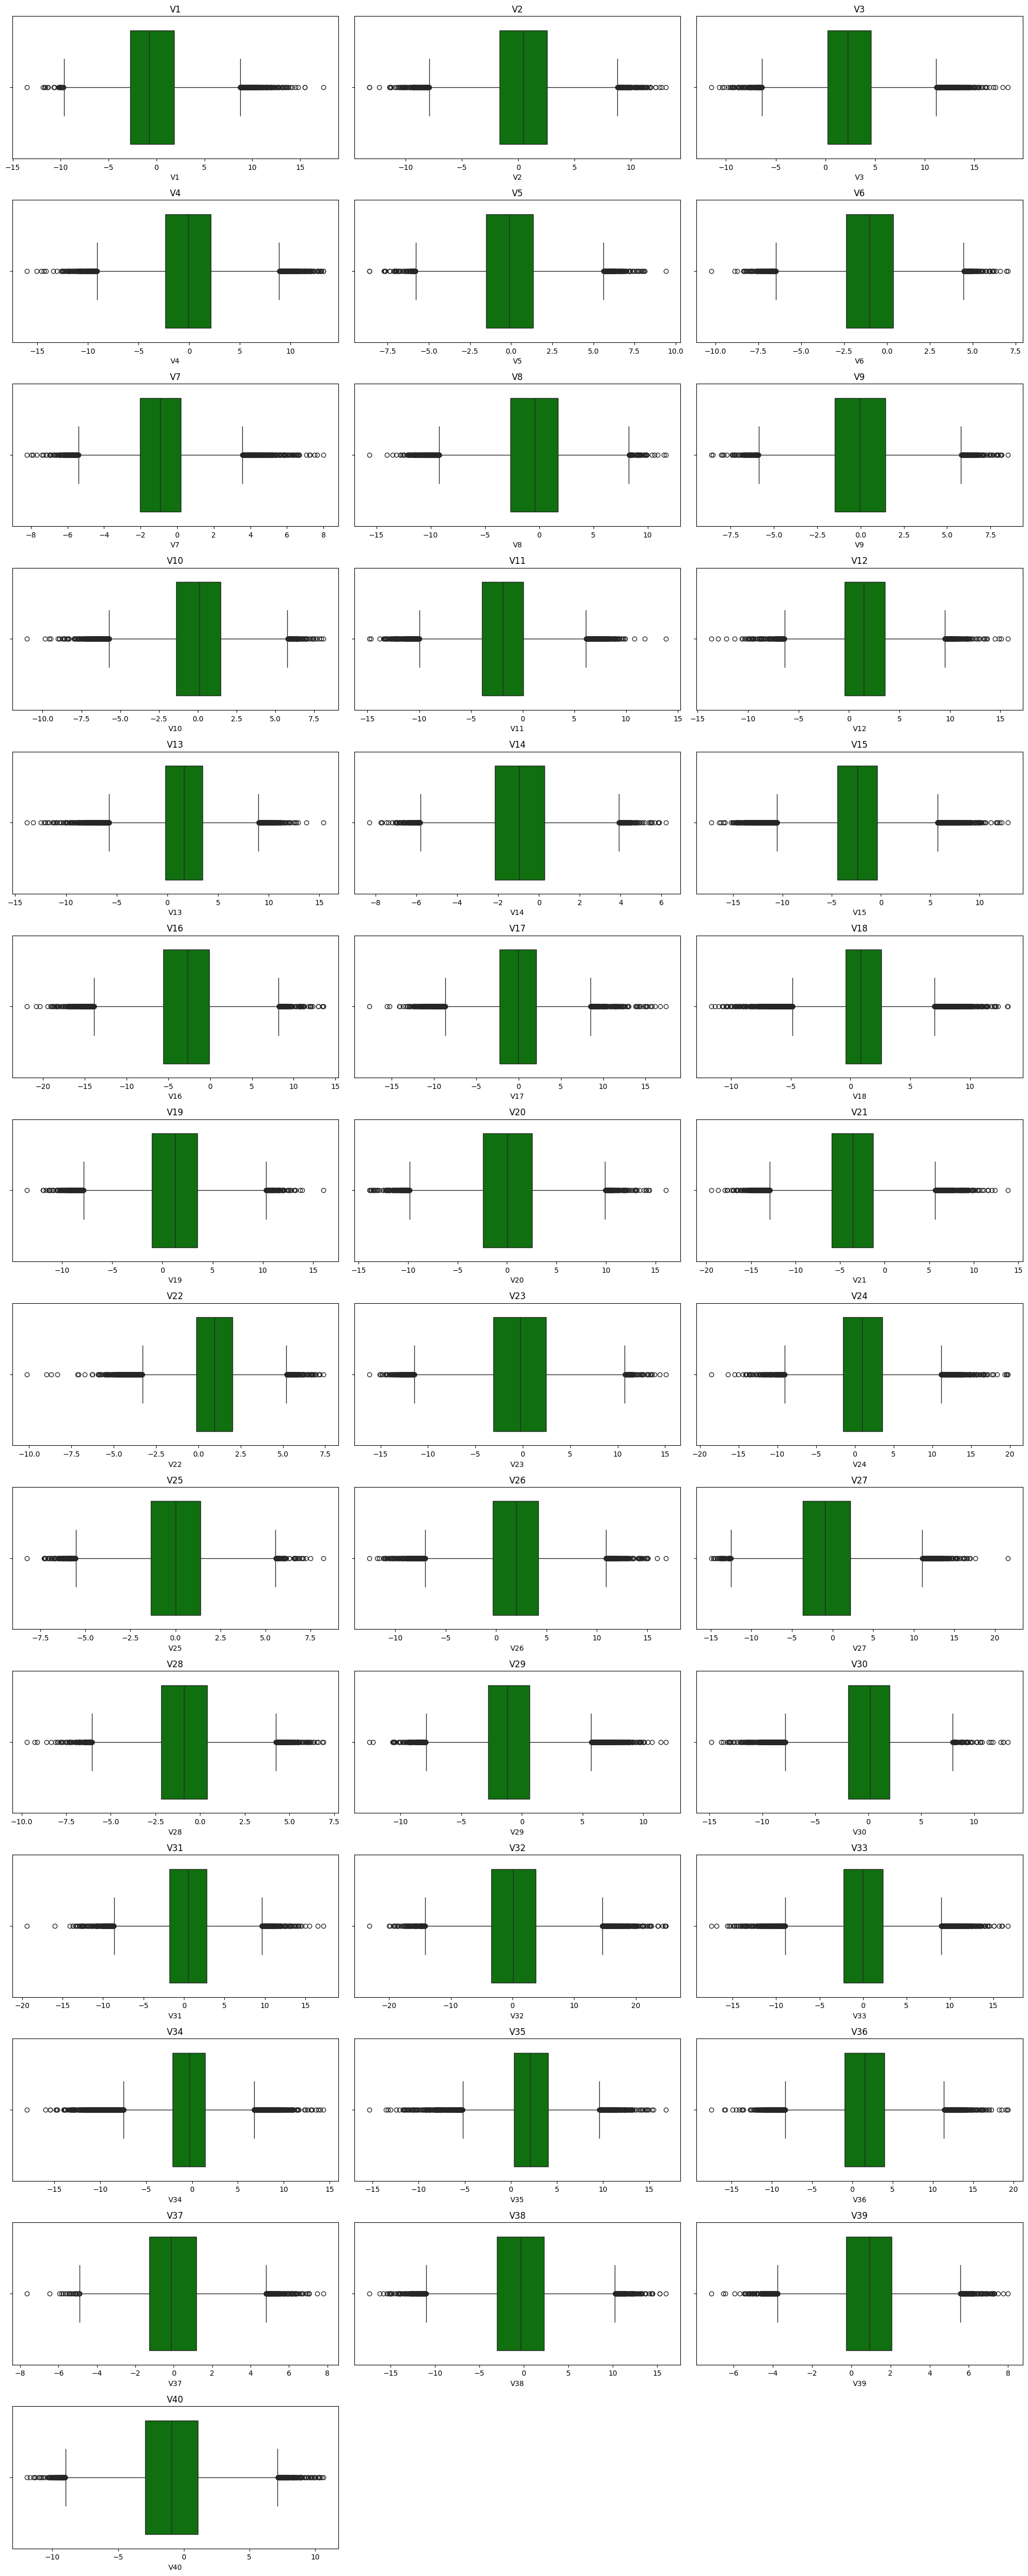

In [12]:
plt.figure(figsize=(20, 50))
for i,variable  in enumerate(cols):
    plt.subplot(14,3,i+1)
    sns.boxplot(x=data[variable], color='green')
    plt.tight_layout()
    plt.title(variable)
plt.show()

Data Preprocessing

In [14]:
X =  data.drop(['Target'],axis =1)
y =  data['Target']

In [ ]:
X_train, X_val , y_train , y_val = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y) #Stratify has maintained a distribution

print(X_train.shape, X_val.shape)

(28000, 40) (12000, 40)


In [ ]:
y_train.value_counts() # 

Target
0    26469
1     1531
Name: count, dtype: int64

In [23]:
y_val.value_counts()

Target
0    11344
1      656
Name: count, dtype: int64

Missing value Treatment

Missing values of V1 & V2 have been replaced with median imputation

In [28]:
imputer =  SimpleImputer(strategy="median")
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_val = impute.transform(X_val)

Model Evaluation Criteria

Three types of costs associated with the problem

1. Repair Cost ($15,000) - (TP)  - Predicting failures correctly
2. Replacement Cost ($ 40,000) - (FN) - Predicting no faliure although faliure exists (This is the worst can happen)
3. Inspection Cost ($5000) -  (FP) -  Predicting faliures while there is no failures  (This is the shit can happen )

Maintenance cost = TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)

Here the objective is to reduce the maintenance cost so, we want a metric that could reduce the maintenance cost.

The minimum possible maintenance cost = Actual failures*(Repair cost) = (TP + FN)*(Repair cost)
The maintenance cost associated with the model = TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)

Minimum possible cost would be when the model will be able to identify all faliures.  which mean both TP & FN

When we consider the ratio(R) = Minimum Possible Cost/Cost associated with the model

R varies from 0 to 1, 1 mean which recognize all the faliures

So that we can maximize R

In [ ]:
def model_performance(model, predictors, target):
    
    """"
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    
    TP =  confusion_matrix(target,  model.predict(predictors))[1,1]
    FP =  confusion_matrix(target,  model.predict(predictors))[0,1]
    FN =  confusion_matrix(target,  model.predict(predictors))[1,0]

    cost =  TP * 15 + FP * 5 +  FN * 40 # maintenance cost calculated from the model

    minimum_cost =  ( TP + FN) * 15

    ratio =  minimum_cost/cost

    pred =  model.predict(predictors)

    acc =  accuracy_score(target, pred)
    recall =  recall_score(target,pred)
    precision =  precision_score(target, pred)
    f1 =  f1_score(target, pred)

    df_performance= pd.DataFrame( {
        "Accuracy"  : acc,
        "Recall" : recall,
        "Precision" : precision,
        " F1_Score" : f1
    })

    return df_performance

In [43]:
# metric will define for optimization and with cross validation

def min_vs_model_cost (y_train, y_pred):

    TP =  confusion_matrix(y_train,  y_pred)[1,1]
    FP =  confusion_matrix(y_train,  y_pred)[0,1]
    FN =  confusion_matrix(y_train,  y_pred)[1,0]   

    return(( TP + FN) * 15) / (TP * 15 + FP * 5 +  FN * 40)

scorer =  metrics.make_scorer(min_vs_model_cost,  greater_is_better=True)

Proposed Models

In [42]:
model  = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [44]:
kfold= StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
cv_results =  cross_val_score(model, X=X_train,y=y_train, scoring=scorer,cv=kfold)

print(cv_results.mean())

0.7109742970474746
